# Simulaciones PSF


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from enum import Enum, auto
from copy import deepcopy as cpy
from dataclasses import dataclass

@dataclass
class PsfWaveformSpec:
  fo_hz: float
  fs_hz: float
  samples_n: int
  ph_rad: float = 0
  amp: float = 1


# Waveform Generators.
def psf_sine(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * np.sin((2 * np.pi * spec.fo_hz * n / spec.fs_hz) + spec.ph_rad)
  return (sn + amp) / 2

def psf_square(spec: PsfWaveformSpec):
  return psf_sine(spec) >= (spec.amp / 2)
  
def psf_tri(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * signal.sawtooth(2 * np.pi * spec.fo_hz * n / spec.fs_hz + + spec.ph_rad, .5) 
  return (sn + amp) / 2


# Utilities.
def psf_spec_to_time_sec(spec: PsfWaveformSpec):
  return np.arange(spec.samples_n) * 1/spec.fs_hz

def psf_gen_cont_and_disc_wvfm(spec: PsfWaveformSpec, fun=psf_sine):
  spec_cont = cpy(spec)
  spec_cont.fs_hz = spec_cont.fs_hz * 100
  spec_cont.samples_n = spec_cont.samples_n * 100
  return (psf_spec_to_time_sec(spec), fun(spec)), (psf_spec_to_time_sec(spec_cont), fun(spec_cont))  


Text(0, 0.5, 'Magnitude')

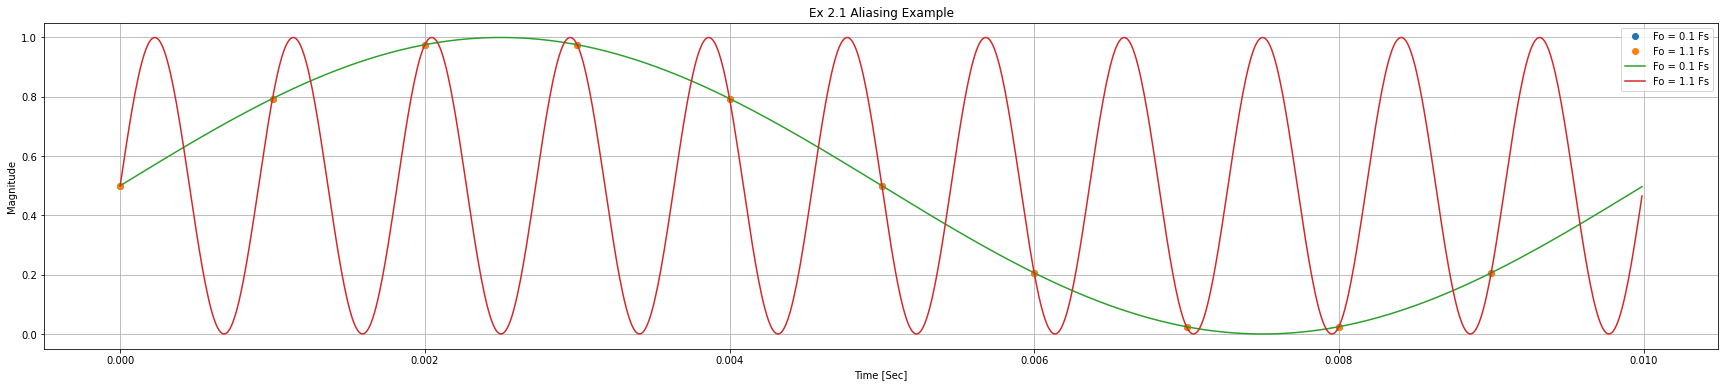

In [29]:
# Ex. 2.1
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 10,
    ph_rad = 0,
    amp = 1
)

spec_2_1_a = cpy(psf_waveform_spec_discrete)
spec_2_1_a.fo_hz = spec_2_1_a.fs_hz * 0.1

spec_2_1_b = cpy(psf_waveform_spec_discrete)
spec_2_1_b.fo_hz = spec_2_1_a.fs_hz * 1.1

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_1_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_1_b)

plt.figure(figsize=(30, 6))
plt.title('Ex 2.1 Aliasing Example')
plt.plot(t1d, f1d, 'o', label='Fo = 0.1 Fs')
plt.plot(t2d, f2d, 'o', label='Fo = 1.1 Fs')
plt.plot(t1c, f1c, label='Fo = 0.1 Fs')
plt.plot(t2c, f2c, label='Fo = 1.1 Fs')
plt.grid()
plt.legend()
plt.xlabel('Time [Sec]')
plt.ylabel('Magnitude')



Text(0, 0.5, 'Magnitude')

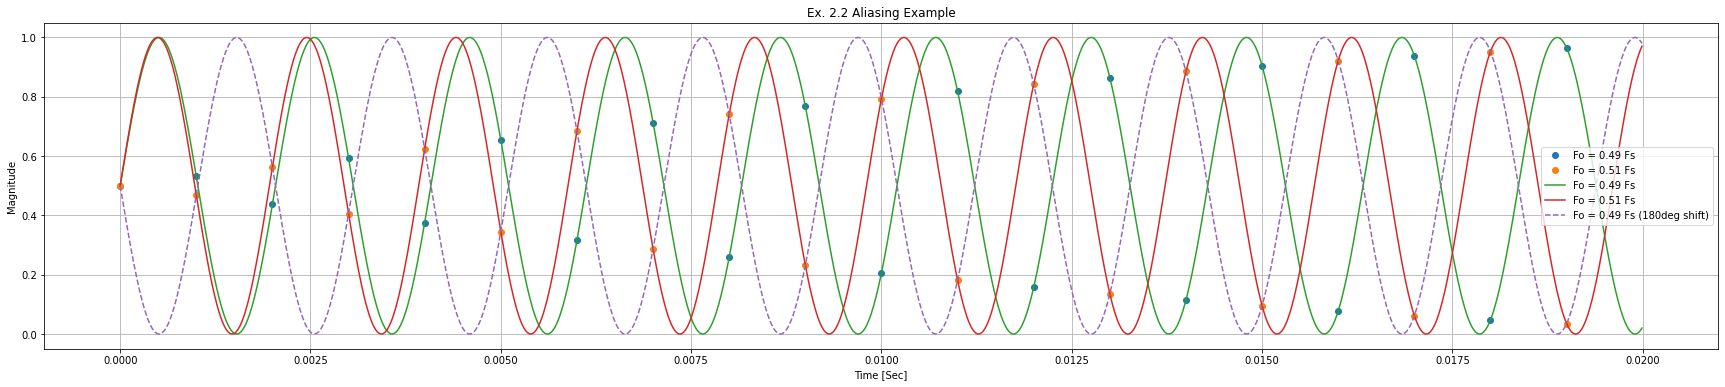

In [28]:
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 20,
    ph_rad = 0,
    amp = 1
)


spec_2_2_a = cpy(psf_waveform_spec_discrete)
spec_2_2_a.fo_hz = spec_2_1_a.fs_hz * 0.49

spec_2_2_b = cpy(psf_waveform_spec_discrete)
spec_2_2_b.fo_hz = spec_2_1_a.fs_hz * 0.51

spec_2_2_c = cpy(psf_waveform_spec_discrete)
spec_2_2_c.ph_rad = np.pi
spec_2_2_c.fo_hz = spec_2_1_a.fs_hz * 0.49

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_2_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_2_b)
(t3d, f3d), (t3c, f3c) = psf_gen_cont_and_disc_wvfm(spec_2_2_c)

plt.figure(figsize=(30, 6))
plt.title('Ex. 2.2 Aliasing Example')
plt.plot(t1d, f1d, 'o', label='Fo = 0.49 Fs')
plt.plot(t2d, f2d, 'o', label='Fo = 0.51 Fs')
plt.plot(t1c, f1c, label='Fo = 0.49 Fs')
plt.plot(t2c, f2c, label='Fo = 0.51 Fs')
plt.plot(t3c, f3c, '--',label='Fo = 0.49 Fs (180deg shift)')
plt.grid()
plt.legend()
plt.xlabel('Time [Sec]')
plt.ylabel('Magnitude')